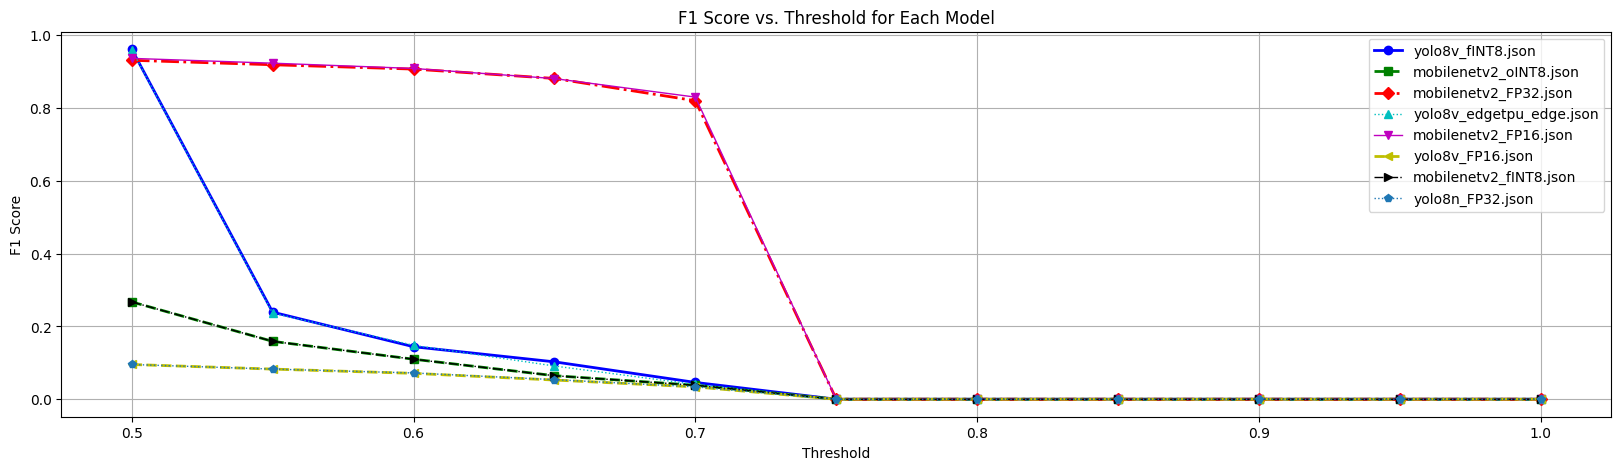

In [4]:
import matplotlib.pyplot as plt
import json
import os

labels = ["rice_weevil", "red_flour_beetle"]

# Colores, marcadores, estilos de línea y grosores para alternar entre ellos
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f']
markers = ['o', 's', 'D', '^', 'v', '<', '>', 'p', 'P', '*', 'X', 'd', '|', '_', 'H']
linestyles = ['-', '--', '-.', ':', '-', '--', '-.', ':', '-', '--', '-.', ':', '-', '--', '-.']
linewidths = [2, 2, 2, 1, 1, 2, 1, 1, 1.5, 2.5, 1, 2, 3, 1.5, 2.5]  # Definir grosores de línea

# Inicializar diccionario para almacenar los f1 scores de cada modelo
f1_scores_all_models = {}

# Cargar los datos de cada modelo
json_files = [file for file in os.listdir() if file.endswith('.json')]
for json_file in json_files:
    # Crear un nombre corto eliminando "_inference_metrics.json"
    name = json_file.replace('.json', '')

    # Cargar el archivo JSON
    with open(json_file, 'r') as file:
        data = json.load(file)

    # Filtrar el diccionario para eliminar la clave "load time" y poder mirar inferencias individuales
    filtered_data = {key: value for key, value in data.items() if key != "load time"}

    # Inicializar el diccionario para almacenar resultados
    f1_scores = []

    # Número total de imágenes
    total_images = len(filtered_data)

    # Barrido de thresholds
    thresholds = [round(i * 0.05, 2) for i in range(10, 21)]  # De 0.5 a 1.0
    for threshold in thresholds:
        TP = 0
        FP = 0
        FN = 0

        for key, value in filtered_data.items():
            gt_label = value['label name']
            pred_id = value['inference ids'][0]
            pred_conf = value['inference probs'][0]

            # Obtener la etiqueta de predicción
            pred_label = labels[pred_id]

            # Determinar TP, FP, y FN
            if pred_conf >= threshold:
                if pred_label == gt_label:
                    TP += 1
                else:
                    FP += 1
            else:
                if gt_label in labels:  # Si la etiqueta verdadera es válida
                    FN += 1

        # Calcular precision, recall y F1 score
        precision = TP / (TP + FP) if (TP + FP) > 0 else 0
        recall = TP / (TP + FN) if (TP + FN) > 0 else 0
        f1_score = (2 * precision * recall / (precision + recall)) if (precision + recall) > 0 else 0
        f1_scores.append(f1_score)

    # Guardar los f1 scores de este archivo en el diccionario usando el nombre corto
    f1_scores_all_models[name] = f1_scores

# Graficar los F1 scores de cada modelo con colores, marcadores, estilos de línea y grosores alternados
plt.figure(figsize=(20, 5))
for idx, (model, f1_scores) in enumerate(f1_scores_all_models.items()):
    color = colors[idx % len(colors)]
    marker = markers[idx % len(markers)]
    linestyle = linestyles[idx % len(linestyles)]
    linewidth = linewidths[idx % len(linewidths)]  # Seleccionar el grosor de línea correspondiente
    plt.plot(thresholds, f1_scores, label=model, color=color, marker=marker, linestyle=linestyle, linewidth=linewidth)

plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.title('F1 Score vs. Threshold for Each Model')
plt.legend()
plt.grid(True)
plt.show()